In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cp

In [4]:
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file) ## open the data using xr.open_dataset()
data

<xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 529, nbnds: 2)
Coordinates:
  * level      (level) float32 2.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    air        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [5]:
## extract the details of the files loaded using xarray 

print(data.air.attrs)
print(data.air.dims)
print(data.air.coords)
print(data.air.data)
print(data.air.encoding)
print(data.air.values)
print(data.air.attrs['units'])  # datset_variable.variable_name.attrs['units']

{'long_name': 'Monthly Mean of Forecast of Air temperature at 2 m', 'units': 'degK', 'precision': 2, 'GRIB_id': 11, 'GRIB_name': 'TMP', 'var_desc': 'Air temperature', 'dataset': 'NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages', 'level_desc': '2 m', 'statistic': 'Mean', 'parent_stat': 'Individual Obs', 'standard_name': 'air_temperature', 'cell_methods': 'time: mean (interval: 6 hours to daily) time: mean (interval: 1 day to monthly)', 'valid_range': array([120., 430.], dtype=float32), 'actual_range': array([197.63, 313.76], dtype=float32)}
('time', 'level', 'lat', 'lon')
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
[[[[239.67    239.64    239.62    ... 239.77    239.74    239.7    ]
   [241.2     241.11    241.01    ... 241.44    241.37    241.29   

In [8]:
# let try to do a spatial plot of the data

# reduce the dimensions 
data_mean  = data.air.mean(dim=['time','level'])
data_mean

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[257.53845, 257.6219 , 257.6049 , ..., 257.56805, 257.58505,
        257.5414 ],
       [257.75436, 257.8153 , 257.85886, ..., 257.6604 , 257.69244,
        257.73047],
       [257.92075, 258.04474, 258.1469 , ..., 257.66226, 257.73523,
        257.83163],
       ...,
       [233.16258, 232.61668, 232.08446, ..., 234.88156, 234.29582,
        233.72296],
       [232.20773, 231.84747, 231.49063, ..., 233.30655, 232.93875,
        232.57211],
       [230.4654 , 230.31566, 230.16544, ..., 230.91402, 230.76501,
        230.61537]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

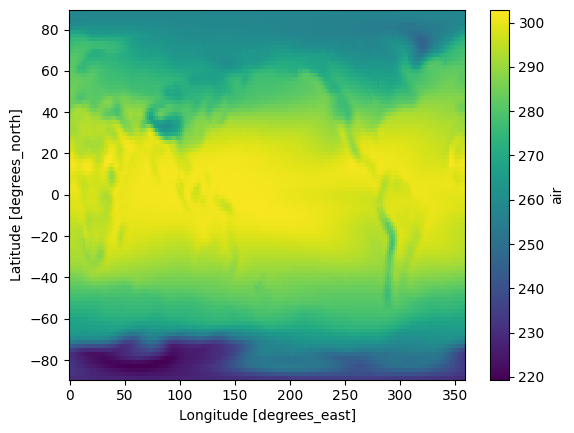

In [9]:
# lets do the plot 
data_mean.plot()

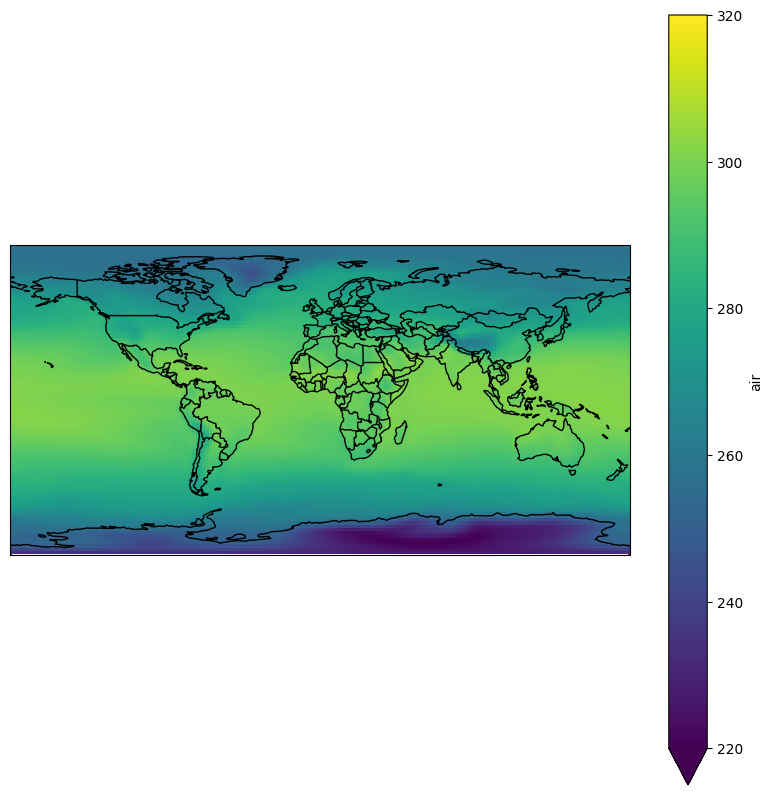

In [10]:
# time for pretty plot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-90,90],crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

data_mean.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='viridis',vmin=220,vmax=320) # 220K - 32
plt.show()

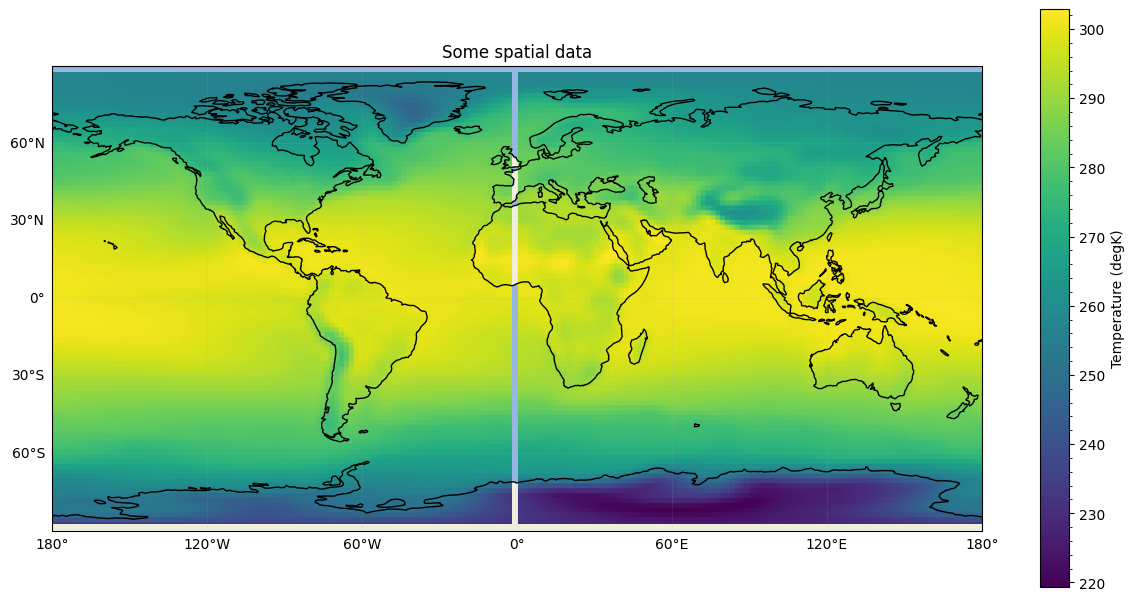

In [14]:
# now do a pretty plot

#read the lat and lons
lat = data.air.lat
lon = data.air.lon


fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
mp = ax.imshow(data_mean,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='viridis')

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='blue')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp,shrink=0.5,label='Temperature (degK)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False
plt.title('Some spatial data')
plt.show()